In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

plt.style.use('tableau-colorblind10')

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [5]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [6]:
df[df.species=='Adelie'].island.value_counts()

Dream        56
Torgersen    52
Biscoe       44
Name: island, dtype: int64

In [7]:
df[df.species=='Gentoo'].island.value_counts()

Biscoe    124
Name: island, dtype: int64

In [8]:
df[df.species=='Chinstrap'].island.value_counts()

Dream    68
Name: island, dtype: int64

In [9]:
df.groupby(['species', 'sex']).agg(minCulmenLength=('culmen_length_mm', 'min'), meanCulmenLength=('culmen_length_mm', 'mean'), maxCulmenLength=('culmen_length_mm', 'max'))

minCulmenLength  meanCulmenLength  maxCulmenLength
species   sex                                                       
Adelie    FEMALE             32.1         37.257534             42.2
          MALE               34.6         40.390411             46.0
Chinstrap FEMALE             40.9         46.573529             58.0
          MALE               48.5         51.094118             55.8
Gentoo    .                  44.5         44.500000             44.5
          FEMALE             40.9         45.563793             50.5
          MALE               44.4         49.473770             59.6

In [10]:
df.groupby(['species','sex']).agg(minCulmenDepth=('culmen_depth_mm', 'min'), meanCulmenDepth=('culmen_depth_mm', 'mean'), maxCulmenDepth=('culmen_depth_mm', 'max'))

minCulmenDepth  meanCulmenDepth  maxCulmenDepth
species   sex                                                    
Adelie    FEMALE            15.5        17.621918            20.7
          MALE              17.0        19.072603            21.5
Chinstrap FEMALE            16.4        17.588235            19.4
          MALE              17.5        19.252941            20.8
Gentoo    .                 15.7        15.700000            15.7
          FEMALE            13.1        14.237931            15.5
          MALE              14.1        15.718033            17.3

In [11]:
df.groupby(['species','sex']).agg(minFlipperLength=('flipper_length_mm', 'min'), meanFlipperLength=('flipper_length_mm', 'mean'), maxFlipperLength=('flipper_length_mm', 'max'))

minFlipperLength  meanFlipperLength  maxFlipperLength
species   sex                                                          
Adelie    FEMALE             172.0         187.794521             202.0
          MALE               178.0         192.410959             210.0
Chinstrap FEMALE             178.0         191.735294             202.0
          MALE               187.0         199.911765             212.0
Gentoo    .                  217.0         217.000000             217.0
          FEMALE             203.0         212.706897             222.0
          MALE               208.0         221.540984             231.0

In [12]:
df.groupby(['species','sex']).agg(minBodyMass=('body_mass_g', 'min'), meanBodyMass=('body_mass_g', 'mean'), maxBodyMass=('body_mass_g', 'max'))

minBodyMass  meanBodyMass  maxBodyMass
species   sex                                           
Adelie    FEMALE       2850.0   3368.835616       3900.0
          MALE         3325.0   4043.493151       4775.0
Chinstrap FEMALE       2700.0   3527.205882       4150.0
          MALE         3250.0   3938.970588       4800.0
Gentoo    .            4875.0   4875.000000       4875.0
          FEMALE       3950.0   4679.741379       5200.0
          MALE         4750.0   5484.836066       6300.0

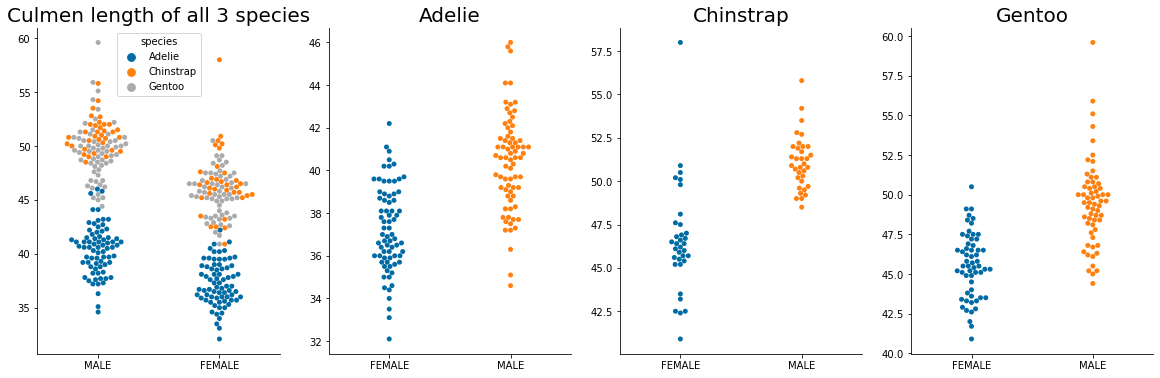

In [13]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.swarmplot(data=df[df.sex!='.'], y='culmen_length_mm', x='sex', hue='species')
plt.title('Culmen length of all 3 species', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 2)
sns.swarmplot(data=df[df.species=='Adelie'].sort_values(by='sex'), y='culmen_length_mm', x='sex')
plt.title('Adelie', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 3)
sns.swarmplot(data=df[df.species=='Chinstrap'].sort_values(by='sex'), y='culmen_length_mm', x='sex')
plt.title('Chinstrap', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4,4)
sns.swarmplot(data=df[(df.species=='Gentoo')&(df.sex!='.')].sort_values(by='sex'), y='culmen_length_mm', x='sex')
plt.title('Gentoo', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

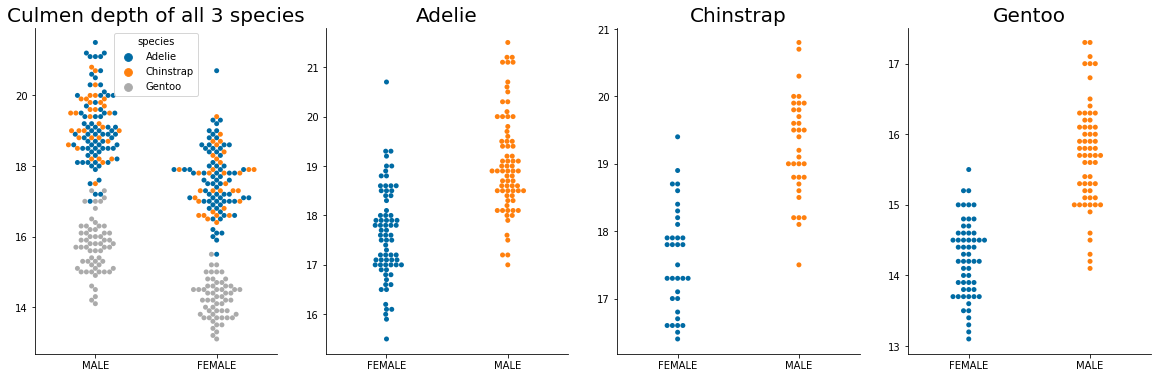

In [15]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.swarmplot(data=df[df.sex!='.'], y='culmen_depth_mm', x='sex', hue='species')
plt.title('Culmen depth of all 3 species', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 2)
sns.swarmplot(data=df[df.species=='Adelie'].sort_values(by='sex'), y='culmen_depth_mm', x='sex')
plt.title('Adelie', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 3)
sns.swarmplot(data=df[df.species=='Chinstrap'].sort_values(by='sex'), y='culmen_depth_mm', x='sex')
plt.title('Chinstrap', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4,4)
sns.swarmplot(data=df[(df.species=='Gentoo')&(df.sex!='.')].sort_values(by='sex'), y='culmen_depth_mm', x='sex')
plt.title('Gentoo', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

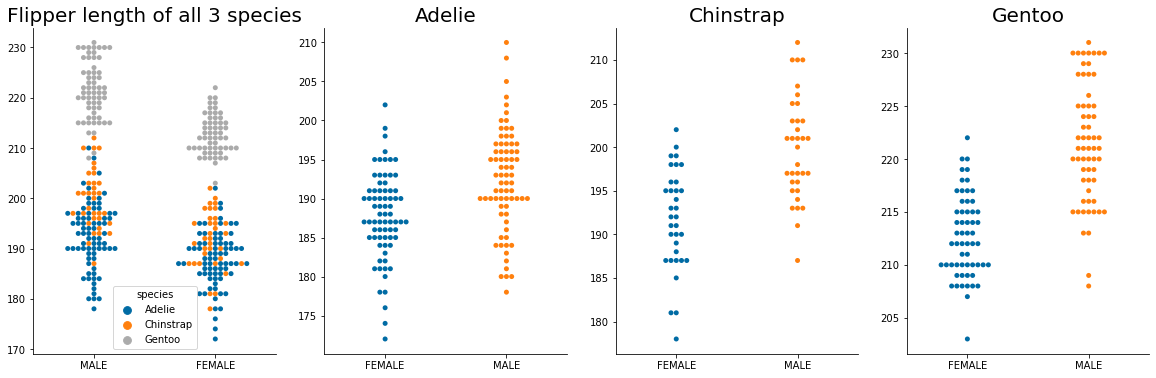

In [16]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.swarmplot(data=df[df.sex!='.'], y='flipper_length_mm', x='sex', hue='species')
plt.title('Flipper length of all 3 species', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 2)
sns.swarmplot(data=df[df.species=='Adelie'].sort_values(by='sex'), y='flipper_length_mm', x='sex')
plt.title('Adelie', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 3)
sns.swarmplot(data=df[df.species=='Chinstrap'].sort_values(by='sex'), y='flipper_length_mm', x='sex')
plt.title('Chinstrap', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4,4)
sns.swarmplot(data=df[(df.species=='Gentoo')&(df.sex!='.')].sort_values(by='sex'), y='flipper_length_mm', x='sex')
plt.title('Gentoo', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

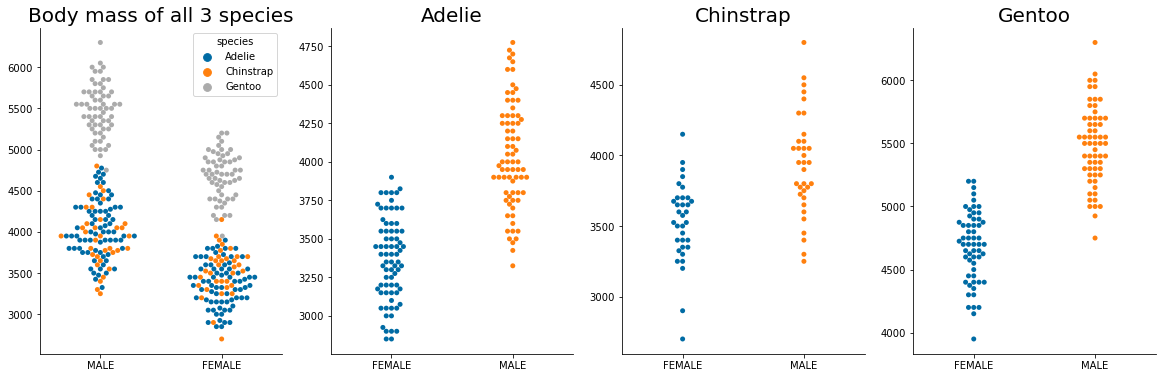

In [17]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.swarmplot(data=df[df.sex!='.'], y='body_mass_g', x='sex', hue='species')
plt.title('Body mass of all 3 species', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 2)
sns.swarmplot(data=df[df.species=='Adelie'].sort_values(by='sex'), y='body_mass_g', x='sex')
plt.title('Adelie', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4, 3)
sns.swarmplot(data=df[df.species=='Chinstrap'].sort_values(by='sex'), y='body_mass_g', x='sex')
plt.title('Chinstrap', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.subplot(1, 4,4)
sns.swarmplot(data=df[(df.species=='Gentoo')&(df.sex!='.')].sort_values(by='sex'), y='body_mass_g', x='sex')
plt.title('Gentoo', fontsize=20)
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Logistic Regression for predicting penguin gender

In [161]:
metrics = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
models = {}
df2 = df.dropna(axis=0, how='any').copy()

for metric in metrics:
    models[metric] = {}
    
    for species in df.species.unique():
        models[metric][species] = {}
        species_dict = models[metric][species]

        species_df = df2[(df2.sex!='.') & (df2.species==species)]
        num_sample = round(len(species_df)*0.9)
        test_sample = len(species_df) - num_sample

        model = LogisticRegression()
        X = []
        y = []

        Xtest = []
        ytest = []

        train_indices = np.random.choice(species_df.index, num_sample)
        for i in train_indices:
            X.append(species_df.loc[i][metric])
            y.append(species_df.loc[i]['sex'])

        for i in species_df.index:
            if i not in train_indices:
                Xtest.append(species_df.loc[i][metric])
                ytest.append(species_df.loc[i]['sex'])

        X = np.array(X).reshape(-1, 1)
        y = np.array(y)
        Xtest = np.array(Xtest).reshape(-1, 1)
        ytest = np.array(ytest)

        model.fit(X, y)
        yhat = model.predict(X)
        train_acc = accuracy_score(y, yhat)
        yhattest = model.predict(Xtest)
        test_acc = accuracy_score(ytest, yhattest)

        species_dict['model'] = model
        species_dict['train_size'] = num_sample
        species_dict['train_acc'] = train_acc
        species_dict['test_size'] = test_sample
        species_dict['test_acc'] = test_acc

pd.DataFrame.from_dict({(i, j): models[i][j]
    for i in models.keys()
    for j in models[i].keys()}, orient='index')[['train_acc', 'test_acc']]

train_acc  test_acc
culmen_length_mm  Adelie      0.755725  0.771930
                  Chinstrap   0.819672  0.774194
                  Gentoo      0.757009  0.872340
culmen_depth_mm   Adelie      0.770992  0.750000
                  Chinstrap   0.885246  0.826087
                  Gentoo      0.906542  0.840909
flipper_length_mm Adelie      0.610687  0.737705
                  Chinstrap   0.819672  0.600000
                  Gentoo      0.794393  0.795918
body_mass_g       Adelie      0.832061  0.859375
                  Chinstrap   0.704918  0.869565
                  Gentoo      0.542056  0.489362

In [172]:
models_2features = {}
df2 = df.dropna(axis=0, how='any').copy()
    
for species in df.species.unique():
    models_2features[species] = {}
    species_dict = models_2features[species]

    species_df = df2[(df2.sex!='.') & (df2.species==species)]
    num_sample = round(len(species_df)*0.9)
    test_sample = len(species_df) - num_sample

    model = LogisticRegression()
    X = []
    y = []

    Xtest = []
    ytest = []

    train_indices = np.random.choice(species_df.index, num_sample)
    for i in train_indices:
        data = [species_df.loc[i]['culmen_length_mm'],
            species_df.loc[i]['culmen_depth_mm']]
        X.append(data)
        y.append(species_df.loc[i]['sex'])

    for i in species_df.index:
        if i not in train_indices:
            data = [species_df.loc[i]['culmen_length_mm'],
                species_df.loc[i]['culmen_depth_mm']]
            Xtest.append(data)
            ytest.append(species_df.loc[i]['sex'])

    X = np.array(X)
    y = np.array(y)
    Xtest = np.array(Xtest)
    ytest = np.array(ytest)

    model.fit(X, y)
    yhat = model.predict(X)
    train_acc = accuracy_score(y, yhat)
    yhattest = model.predict(Xtest)
    test_acc = accuracy_score(ytest, yhattest)

    species_dict['model'] = model
    species_dict['train_size'] = num_sample
    species_dict['train_acc'] = train_acc
    species_dict['test_size'] = test_sample
    species_dict['test_acc'] = test_acc

pd.DataFrame.from_dict(models_2features, orient='index')[['train_acc', 'test_acc']]

,train_acc,test_acc
Adelie,0.885496,0.877193
Chinstrap,0.918033,0.862069
Gentoo,0.915888,0.862745


In [173]:
models_allfeatures = {}
df2 = df.dropna(axis=0, how='any').copy()
    
for species in df.species.unique():
    models_allfeatures[species] = {}
    species_dict = models_allfeatures[species]

    species_df = df2[(df2.sex!='.') & (df2.species==species)]
    num_sample = round(len(species_df)*0.9)
    test_sample = len(species_df) - num_sample

    model = LogisticRegression()
    X = []
    y = []

    Xtest = []
    ytest = []

    train_indices = np.random.choice(species_df.index, num_sample)
    for i in train_indices:
        data = [species_df.loc[i]['culmen_length_mm'],
            species_df.loc[i]['culmen_depth_mm'],
            species_df.loc[i]['flipper_length_mm'],
            species_df.loc[i]['body_mass_g']]
        X.append(data)
        y.append(species_df.loc[i]['sex'])

    for i in species_df.index:
        if i not in train_indices:
            data = [species_df.loc[i]['culmen_length_mm'],
                species_df.loc[i]['culmen_depth_mm'],
                species_df.loc[i]['flipper_length_mm'],
                species_df.loc[i]['body_mass_g']]
            Xtest.append(data)
            ytest.append(species_df.loc[i]['sex'])

    X = np.array(X)
    y = np.array(y)
    Xtest = np.array(Xtest)
    ytest = np.array(ytest)

    model.fit(X, y)
    yhat = model.predict(X)
    train_acc = accuracy_score(y, yhat)
    yhattest = model.predict(Xtest)
    test_acc = accuracy_score(ytest, yhattest)

    species_dict['model'] = model
    species_dict['train_size'] = num_sample
    species_dict['train_acc'] = train_acc
    species_dict['test_size'] = test_sample
    species_dict['test_acc'] = test_acc

pd.DataFrame.from_dict(models_allfeatures, orient='index')[['train_acc', 'test_acc']]

,train_acc,test_acc
Adelie,0.885496,0.952381
Chinstrap,0.704918,0.709677
Gentoo,0.887850,0.888889
